# Handling sidewall core data

In [1]:
from striplog import Striplog
% matplotlib inline

Some things really are point data. Sort of like a log, but irregular, more discrete. For instance we may have some porosity measurements of sidewall core plugs.

In [2]:
swc_pore_csv = """
1200, 6.4
1205, 7.3
1210, 8.2
1250, 9.2
1275, 4.3
1300, 2.2
"""

You must specify `points=True` otherwise Striplog will 'fill in' and create the bases for you, based on the next top.

In [3]:
from striplog import Lexicon
lexicon = Lexicon.default()
lexicon.data = [r'[-0-9\.]+']
swc_porosity = Striplog.from_csv(swc_pore_csv, lexicon=lexicon, points=True)

In [4]:
swc_porosity

Striplog(6 Intervals, start=1300.0, stop=1200.0)

In [5]:
swc_porosity[0]

Interval({'description': '6.4', 'base': Position({'middle': 1200.0, 'units': 'm'}), 'top': Position({'middle': 1200.0, 'units': 'm'}), 'components': [Component({'data': '6.4'})]})

The way we distinguish this kind of data from other striplogs is the `points.order`

In [6]:
swc_porosity.order

'none'

When we pass this 'striplog' into `welly.plot()`, it gets treated as a set of points.

AttributeError: Unknown property field

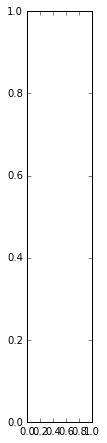

In [7]:
swc_porosity.plot(field='data', aspect=4)

# To Do: show this in welly

but for now...

In [8]:
z = []
val = []
for point in swc_porosity:
    z.append(point.top.middle)
    val.append(point.description)

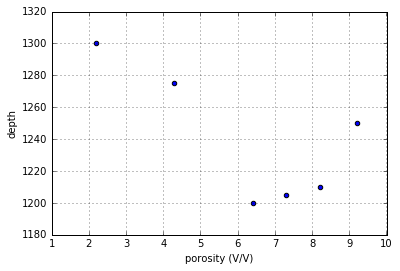

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(val,z)
plt.ylabel('depth')
plt.xlabel('porosity (V/V)')
plt.grid()